<a href="https://colab.research.google.com/github/econdatatech/AIML429/blob/main/Deconfounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

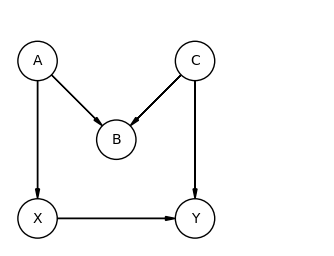

Possible backdoor adjustment sets: frozenset()


/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [5]:
!pip3 install -q daft
!pip3 install -q pgmpy
import matplotlib.pyplot as plt
%matplotlib inline
import daft
from daft import PGM

# We can now import the development version of pgmpy
from pgmpy.models.BayesianModel import BayesianModel
from pgmpy.inference.CausalInference import CausalInference

def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model
pgm = PGM(shape=[4, 3])

pgm.add_node(daft.Node('A', r"A", 1, 3))
pgm.add_node(daft.Node('C', r"C", 3, 3))
pgm.add_node(daft.Node('B', r"B", 2, 2))
pgm.add_node(daft.Node('X', r"X", 1, 1))
pgm.add_node(daft.Node('Y', r"Y", 3, 1))


pgm.add_edge('A', 'B')
pgm.add_edge('C', 'B')
pgm.add_edge('A', 'X')
pgm.add_edge('C', 'Y')
pgm.add_edge('X', 'Y')

pgm.render()
plt.show()
game1 = convert_pgm_to_pgmpy(pgm)
inference1 = CausalInference(game1)
adj_sets = inference1.get_all_backdoor_adjustment_sets("X", "Y")
print(f"Possible backdoor adjustment sets: {adj_sets}")